In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import math
import yfinance as yf
import requests as rq
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
aapl = yf.Ticker("AAPL")

# get stock info
aapl.info

# get historical market data
hist = aapl.history(period="48mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-07-05,44.526403,44.802802,44.290865,44.560051,66416800,0.0,0.0
2018-07-06,44.564864,45.288303,44.511988,45.177746,69940800,0.0,0.0
2018-07-09,45.545473,45.829078,45.497404,45.805046,79026400,0.0,0.0
2018-07-10,45.836280,45.973275,45.708894,45.749756,63756400,0.0,0.0
2018-07-11,45.305122,45.612764,45.091215,45.156109,75326000,0.0,0.0
...,...,...,...,...,...,...,...
2022-06-28,142.130005,143.419998,137.320007,137.440002,67083400,0.0,0.0
2022-06-29,137.460007,140.669998,136.669998,139.229996,66242400,0.0,0.0
2022-06-30,137.250000,138.369995,133.770004,136.720001,98964500,0.0,0.0


In [5]:
#Get the shape of the rows and columns in the dataset
hist.shape

(1007, 7)

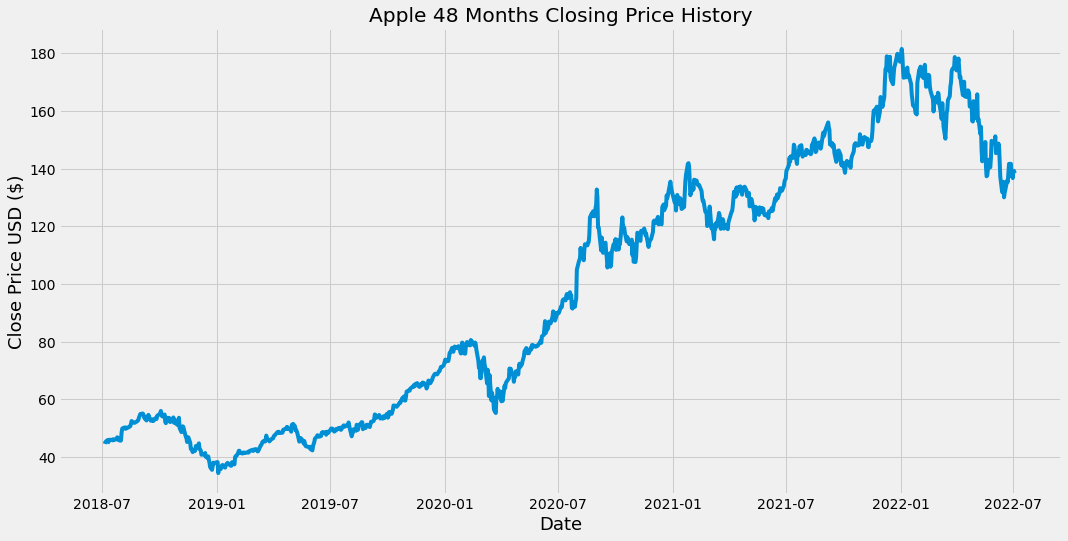

In [6]:
#Visulaize
plt.figure(figsize=(16,8))
plt.title('Apple 48 Months Closing Price History')
plt.plot(hist['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
#Create a new dataframe with only the 'Close' column
data =  hist.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = hist.values
#Get the number of rows to train the model on
training_dataset_len = math.ceil(len(dataset) * .8)

training_dataset_len

806

In [9]:
#Scale the data (Good practice prior to passing to neuro network)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06571676, 0.06478332, 0.06878219, ..., 0.087668  , 0.        ,
        0.        ],
       [0.0659779 , 0.06808222, 0.07031498, ..., 0.0965964 , 0.        ,
        0.        ],
       [0.07263591, 0.0717567 , 0.07714575, ..., 0.11961567, 0.        ,
        0.        ],
       ...,
       [0.69527942, 0.70055713, 0.68903928, ..., 0.17013084, 0.        ,
        0.        ],
       [0.68706388, 0.70510965, 0.7021405 , ..., 0.09929899, 0.        ,
        0.        ],
       [0.69881008, 0.70979811, 0.71097858, ..., 0.        , 0.        ,
        0.        ]])